In [41]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.misc import imresize
from skimage.color import rgb2gray
%matplotlib inline
imagedir  = '../../data/dogs/Images'

In [42]:
def load_images():
    num_samples_per_breed = 50 # number of samples of each breed
    num_breeds = 60
    h = 200
    w = 200
    
    # preinitialize the matrix
    img_arr = np.empty((num_samples_per_breed*num_breeds,h*w))  # 20 instances of each breed, each img will be 200x200 = 40000 pixels
    label_arr = []
    i = 0
    
    # sample 60 breeds from the dataset
    breed_sample_idx = np.random.randint(low=1, high=len(os.listdir(imagedir)), size=(num_breeds))
    for idx in breed_sample_idx:
        breed = os.listdir(imagedir)[idx]
        if breed[0] == '.' : continue # stupid ds.store on mac
        print(breed)
        
        # sample 50 images from the breed
        img_sample_idx = np.random.randint(low=1, high=len(os.listdir(os.path.join(imagedir,breed))), size=(num_samples_per_breed))
        for idx in img_sample_idx:
            dog_path = os.path.join(imagedir,breed,os.listdir(os.path.join(imagedir,breed))[idx])
            img = plt.imread(dog_path)
            
            # converts image to gray, resizes it to be 200x200, and then linearizes it
            img_gray_resize_flat = rgb2gray(imresize(img, (h,w,3))).flatten()
                        
            img_arr[i] = img_gray_resize_flat
            i = i + 1

            # add name to list of labels
            fname = dog_path.split('/')[-1] # 'dog_name_123497.jpg'
            dog_name = fname[:fname.rfind('_')] # 'dog_name'
            label_arr.append(dog_name)
            
    return img_arr, label_arr

In [43]:
%%time
dogs, labels = load_images()

malamute
Leonberg
beagle
Walker_hound
American_Staffordshire_terrier
French_bulldog
Saint_Bernard
schipperke
pug
Shih
Japanese_spaniel
Samoyed
dingo
Bernese_mountain_dog
Japanese_spaniel
Old_English_sheepdog
Chihuahua
Lakeland_terrier
black
Kerry_blue_terrier
English_springer
Blenheim_spaniel
Weimaraner
black
beagle
Kerry_blue_terrier
Rottweiler
clumber
Great_Pyrenees
dhole
English_foxhound
Shih
Scotch_terrier
Rhodesian_ridgeback
soft
otterhound
Irish_terrier
malinois
miniature_poodle
collie
African_hunting_dog
basenji
Bouvier_des_Flandres
Doberman
Mexican_hairless
German_shepherd
Brabancon_griffon
Tibetan_terrier
Sealyham_terrier
bluetick
kelpie
Italian_greyhound
Shetland_sheepdog
Irish_water_spaniel
Border_terrier
otterhound
malamute
miniature_poodle
Yorkshire_terrier
Sealyham_terrier
Wall time: 22.6 s


In [44]:
import pandas as pd

df = pd.DataFrame(dogs)
df.head()

0         1         2         3         4         5         6      \
0  0.293247  0.367756  0.367756  0.375600  0.371678  0.371678  0.371678   
1  0.964015  0.948039  0.913876  0.961501  0.934921  0.668582  0.657978   
2  0.884996  0.884996  0.884996  0.884996  0.888917  0.888917  0.888917   
3  0.864346  0.882555  0.906093  0.921802  0.915663  0.880398  0.830564   
4  0.724404  0.747933  0.767541  0.771463  0.744012  0.736169  0.753536   

      7         8         9        ...        39990     39991     39992  \
0  0.371678  0.371678  0.372794    ...     0.063631  0.072040  0.114344   
1  0.627185  0.616277  0.676507    ...     0.882578  0.899381  0.713111   
2  0.888917  0.888367  0.890622    ...     0.318651  0.299862  0.321709   
3  0.815458  0.814357  0.807935    ...     0.713911  0.581373  0.655050   
4  0.775376  0.763612  0.751847    ...     0.786561  0.788227  0.781485   

      39993     39994     39995     39996     39997     39998     39999  
0  0.105667  0.079317  0.067553  0.075946  0.064182  0.029721  0.007575  
1  0.525702  0.676946  0.884522  0.916735  0.748397  0.461511  0.397909  
2  0.337404  0.396800  0.367668  0.320885  0.332963  0.339170  0.334728  
3  0.841351  0.848093  0.789024  0.658421  0.573262  0.634073  0.644186  
4  0.769736  0.711195  0.721576  0.782922  0.781240  0.763582  0.752933  

[5 rows x 40000 columns]

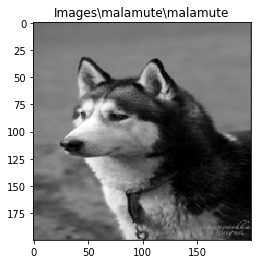

In [45]:
ex = dogs[0].reshape((200,200))
plt.imshow(ex, cmap='gray')
plt.title(labels[0])
plt.show()

In [46]:
# taken from Class Demo #4
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=1.5, top=.90, hspace=.35)
    
    # with slight modification
    sample = np.random.randint(low=0, high=images.shape[0], size=n_row*n_col)
    
    for i, idx in enumerate(sample):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[idx].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[idx], size=12)
        plt.xticks(())
        plt.yticks(())

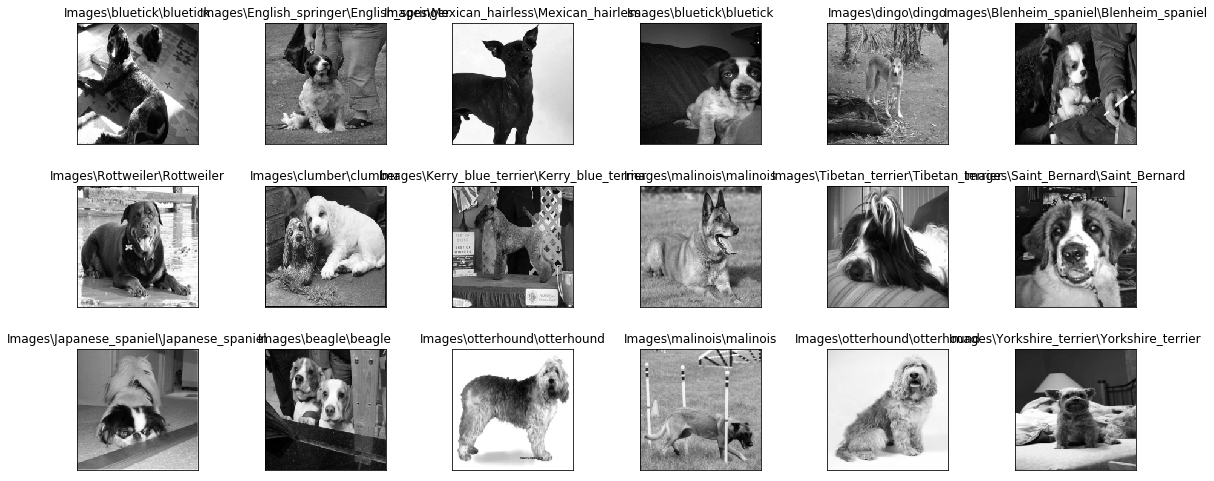

In [47]:
plot_gallery(dogs, labels, 200, 200) # defaults to showing a 3 by 6 subset of the faces

# Full PCA

In [48]:
h = 200
w = 200

In [49]:
from sklearn.decomposition import PCA

n_components = 200
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, dogs.shape[0]))
pca = PCA(n_components=n_components)
%time pca.fit(dogs.copy())
eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting the top 600 eigenfaces from 3000 faces
Wall time: 17.6 s


In [50]:
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Scatter, Marker, Layout, XAxis, YAxis, Bar, Line
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
      

In [51]:
plot_explained_variance(pca)

In [61]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

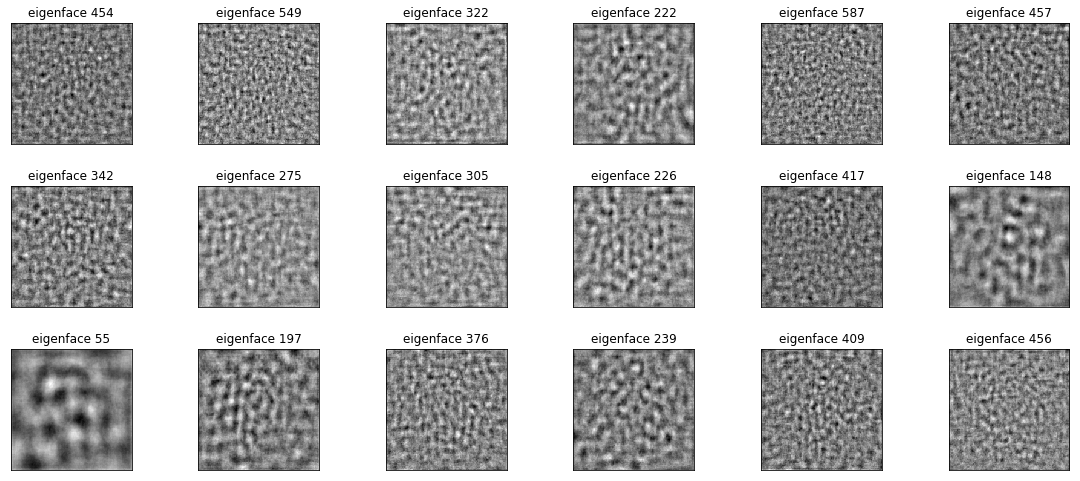

In [62]:
plot_gallery(eigenfaces, eigenface_titles, h, w)

In [63]:
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image

In [64]:
dogs_to_reconstruct = 6    
dogs_idx = dogs[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,dogs_idx.reshape(1, -1))

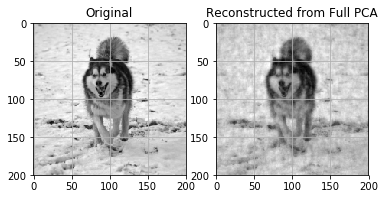

In [65]:
plt.subplot(1,2,1)
plt.imshow(dogs_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid()
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from Full PCA')
plt.grid()

# Randomized PCA

In [68]:
n_components = 300
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, dogs.shape[0]))

rpca = PCA(n_components=n_components,svd_solver='randomized')
%time rpca.fit(dogs.copy())
eigenfaces = rpca.components_.reshape((n_components, h, w))

Extracting the top 300 eigenfaces from 3000 faces
Wall time: 9.77 s


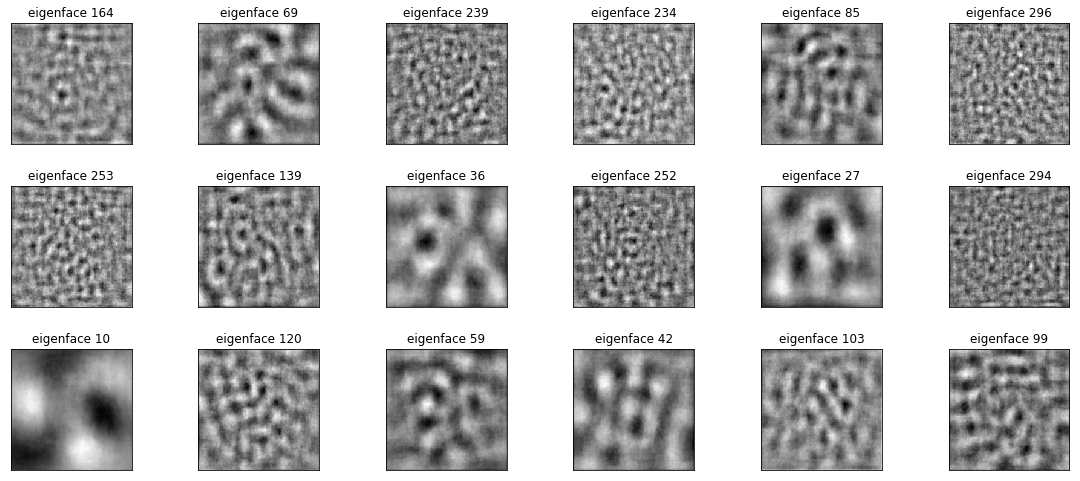

In [69]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

# Kernal PCA

In [70]:
%%time
# SKIP THIS BECAUSE IT TAKES A LONG TIME TO RUN
from sklearn.decomposition import KernelPCA

n_components = 300
# print(np.sum(~np.isfinite(X)))
print ("Extracting the top %d eigenfaces from %d faces" % (n_components, dogs.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=True, gamma=15, # very sensitive to the gamma parameter,
                remove_zero_eig=True)  
kpca.fit(dogs.copy())

Extracting the top 300 eigenfaces from 3000 faces
Wall time: 39min 2s


In [79]:
import pickle
kpca_loaded = pickle.load(open( 'large_data/kpca.p', 'rb' ))

FileNotFoundError: [Errno 2] No such file or directory: 'large_data/kpca.p'

In [80]:
# so let's save out the results to load in later!
import pickle

pickle.dump(kpca, open( 'large_data/kpca.p', 'wb' ))

FileNotFoundError: [Errno 2] No such file or directory: 'large_data/kpca.p'

In [81]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

from ipywidgets import widgets  # make this interactive!
# compare the different methods

def plt_reconstruct(dogs_to_reconstruct):
    dogs_to_reconstruct = np.round(dogs_to_reconstruct)
    
    reconstructed_image = pca.inverse_transform(pca.transform(dogs[dogs_to_reconstruct].reshape(1, -1)))
    reconstructed_image_rpca = rpca.inverse_transform(rpca.transform(dogs[dogs_to_reconstruct].reshape(1, -1)))
    reconstructed_image_kpca = kpca_loaded.inverse_transform(kpca_loaded.transform(dogs[dogs_to_reconstruct].reshape(1, -1)))
    
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,4,1)
    plt.imshow(X[dogs_to_reconstruct].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(names[y[dogs_to_reconstruct]])
    plt.grid()
    
    plt.subplot(1,4,2)
    plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Full PCA')
    plt.grid()
    
    plt.subplot(1,4,3)
    plt.imshow(reconstructed_image_rpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Randomized PCA')
    plt.grid()
    
    plt.subplot(1,4,4)
    plt.imshow(reconstructed_image_kpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Kernel PCA')
    plt.grid()
    
widgets.interact(plt_reconstruct,dogs_to_reconstruct=(0,20,1),__manual=True)

<function __main__.plt_reconstruct>